In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
dataset = pd.read_csv('machineLearningBasic/datasets/Social_Network_Ads.csv')

In [5]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)

(320, 2)


In [65]:
#clf = RandomForestClassifier(n_estimators=10, criterion='entropy')

clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, max_depth=20)

In [66]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=20,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [67]:
y_pred = clf.predict(X_test)

In [68]:
confusion_matrix(y_test, y_pred, [1,0])

array([[27,  4],
       [ 5, 44]], dtype=int64)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91        49
         1.0       0.84      0.87      0.86        31

   micro avg       0.89      0.89      0.89        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



In [70]:
print(accuracy_score(y_test, y_pred))

0.8875


In [71]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,6))
X_set, y_set = X_train, y_train

<Figure size 576x432 with 0 Axes>

In [72]:
xmin = X_set[:, 0].min() - 1
xmax = X_set[:, 0].max() + 1
ymin = X_set[:, 1].min() - 1
ymax = X_set[:, 1].max() + 1
print(xmin)
print(xmax)
print(ymin)
print(ymax)

-2.8291558027267456
3.129596710205078
-2.604499101638794
3.3981781005859375


In [73]:
xx,yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01)) # 그물포 완성!

In [74]:
XX = np.column_stack([xx.ravel(),yy.ravel()])
Y = clf.predict(XX)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


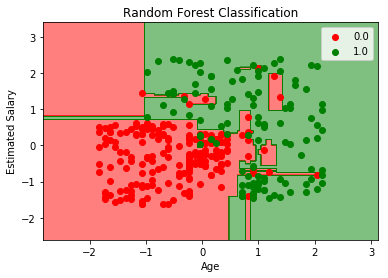

In [75]:
plt.contourf(xx, yy, Y.reshape(xx.shape), alpha=0.5, cmap=ListedColormap(('red', 'green')))

# enumerate 가 index 와 value 를 tuple 형태로 보여주게 하는 것
# i: indect
# j: value
# 아래 형식은 위와 같이 값이 들어가게 되는 것!!! for문은 tuple 형태로만 사용 가능
for i, j in enumerate(np.unique(y_set)):
    # age / salary 순
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
    
plt.title('Random Forest Classification')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()